In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
LOAD THE DATASET

In [2]:
df = pd.read_csv('weather_data_extended.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          800 non-null    object 
 1   Temperature (°C)  800 non-null    float64
 2   Feels Like (°C)   800 non-null    float64
 3   Humidity (%)      798 non-null    float64
 4   Wind Speed (kph)  798 non-null    float64
 5   Cloud Cover (%)   800 non-null    int64  
 6   Pressure (mb)     798 non-null    float64
 7   UV Index          800 non-null    int64  
 8   Visibility (km)   800 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 56.4+ KB


,Location,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
0,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
1,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
2,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
3,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
4,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16


In [9]:
df.describe()

,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,16.580730,16.373804,73.513854,16.123300,43.513854,1013.041562,1.746851,10.732997
std,5.574821,7.382814,16.478897,10.338986,34.845115,7.608453,1.092285,1.966105
min,8.300000,4.500000,40.000000,3.600000,0.000000,900.000000,1.000000,10.000000
25%,15.000000,13.800000,67.000000,6.100000,0.000000,1012.000000,1.000000,10.000000
50%,16.000000,16.000000,76.000000,9.000000,50.000000,1013.000000,1.000000,10.000000
75%,24.000000,25.500000,88.000000,24.100000,75.000000,1019.250000,2.000000,10.000000
max,25.000000,27.800000,100.000000,29.900000,75.000000,1024.000000,4.000000,16.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          794 non-null    object 
 1   Temperature (°C)  794 non-null    float64
 2   Feels Like (°C)   794 non-null    float64
 3   Humidity (%)      794 non-null    float64
 4   Wind Speed (kph)  794 non-null    float64
 5   Cloud Cover (%)   794 non-null    int64  
 6   Pressure (mb)     794 non-null    float64
 7   UV Index          794 non-null    int64  
 8   Visibility (km)   794 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 62.0+ KB


In [ ]:
CHECK FOR MISSING VALUES 

In [8]:
df.isnull().sum()

Location            0
Temperature (°C)    0
Feels Like (°C)     0
Humidity (%)        0
Wind Speed (kph)    0
Cloud Cover (%)     0
Pressure (mb)       0
UV Index            0
Visibility (km)     0
dtype: int64

In [7]:
#Dropping missing values
df=df.dropna()

In [ ]:
# 3 TECHNIQUES TO DEAL WITH NULL VALUES- STRING/OBJECT DATATYPES VALUES MUST BE TRANSFORM TO INTEGER OR FLOAT 
#STEP 1- DELETE ENTIRE ROW CONTAINING NULL VALUES
#STEP 2- INPUTATION (FIRST, TAKE THE MEDIAN TO REPLACE ALL NULL VALUES, THIS IS USED WHEN OUR COLUMN CONTAINS A CONTINUOS VALUE; SECOND, USE MODE TO REPLACE MISSING VALUES, THAT IS WHEN THE DATA IS A CATEGORICAL DATA VALUE.

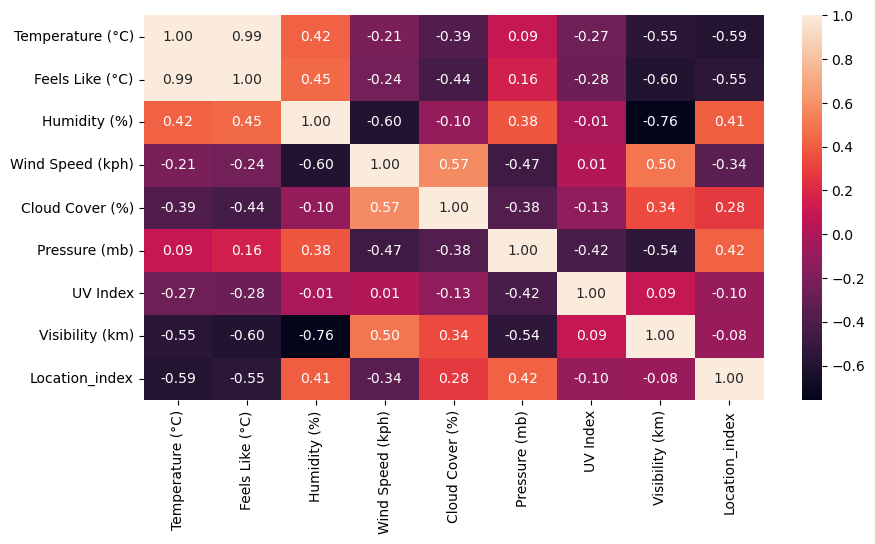

In [20]:
#CORRELATION

import matplotlib.pyplot as plt
import seaborn as sns

numericdf=df.drop('Location',axis=1)
corr=numericdf.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [17]:
df['Location_index']=df['Location'].astype('category').cat.codes
df

,Location,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km),Location_index
0,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
1,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
2,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
3,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
4,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16,3
...,...,...,...,...,...,...,...,...,...,...
795,Hong Kong,25.0,27.8,79.0,29.9,50,1012.0,1,10,1
796,Hong Kong,25.0,27.8,79.0,29.9,50,1012.0,1,10,1
797,Hong Kong,25.0,27.8,79.0,29.9,50,1012.0,1,10,1
798,Hong Kong,25.0,27.8,79.0,29.9,50,1012.0,1,10,1


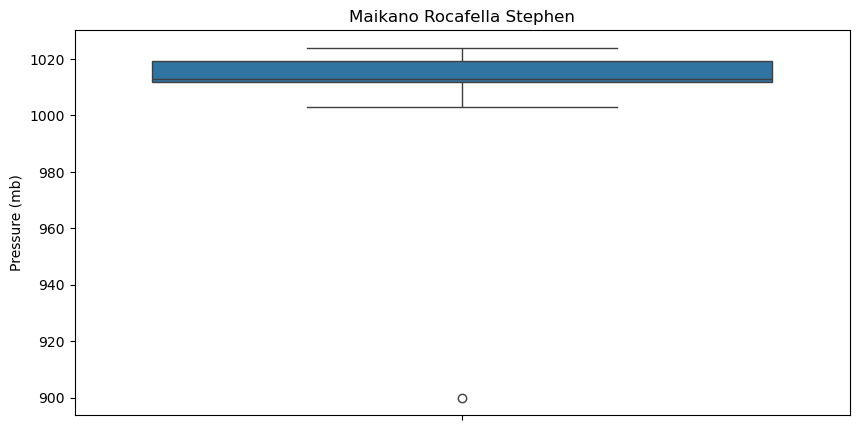

In [21]:
#OUTLIER USING BOXPLOT

plt.figure(figsize=(10,5))
sns.boxplot(data=df['Pressure (mb)'])
plt.title('Maikano Rocafella Stephen')
plt.show()

In [63]:
from sklearn.preprocessing import RobustScaler

scaled_numericdf=RobustScaler().fit_transform(numericdf)

In [64]:
scaled_numericdf

array([[-0.85555556, -0.98290598, -1.71428571, ...,  1.        ,
         6.        , -0.21052632],
       [-0.85555556, -0.98290598, -1.71428571, ...,  1.        ,
         6.        , -0.21052632],
       [-0.85555556, -0.98290598, -1.71428571, ...,  1.        ,
         6.        , -0.21052632],
       ...,
       [ 1.        ,  1.00854701,  0.14285714, ...,  0.        ,
         0.        , -0.63157895],
       [ 1.        ,  1.00854701,  0.14285714, ...,  0.        ,
         0.        , -0.63157895],
       [ 1.        ,  1.00854701,  0.14285714, ...,  0.        ,
         0.        , -0.63157895]])

In [26]:
#CREATE LINEAR REGRESSION MODEL

from sklearn.linear_model import LinearRegression

model= LinearRegression()

In [51]:
#CREATE FEATURE AND LABEL

X=numericdf.drop('Temperature (°C)', axis = 1)
Y=numericdf['Temperature (°C)']


In [52]:
Xscaled=RobustScaler().fit_transform(X)

In [53]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

Xtrain,Xtest, Ytrain, Ytest=train_test_split(Xscaled, Y, test_size=0.3, random_state=15)

In [54]:
#TRAIN MY LINEAR REGRESSION MODEL

model=model.fit(Xtrain,Ytrain)

In [60]:
#MAKE PREDICTION AND EVALUATE MY MODEL (REGR MODEL)
ypred=model.predict(Xtest)

from sklearn.metrics import r2_score,mean_squared_error
#r2: higher is better
r2=r2_score(Ytest,ypred)

In [61]:
r2

1.0

In [62]:
#MSE: Error in your model fit (lower is better)
mse=mean_squared_error(Ytest,ypred)
mse

3.1920150804231638e-28

In [ ]:
#DEFINE FEATURE AND TARGET VARIABLE

In [67]:
X=df[['Humidity (%)', 'Wind Speed (kph)','Pressure (mb)','Visibility (km)','Location_index']] #feature
Y=df['Temperature (°C)'] #Target variable or Label

In [ ]:
#STANDARD SCALING

In [69]:
#Standard scaling the values in features
scaler=RobustScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(df_scaled.describe())

       Humidity (%)  Wind Speed (kph)  Pressure (mb)  Visibility (km)  \
count    794.000000        794.000000     794.000000       794.000000   
mean      -0.118388          0.395739       0.005733         0.732997   
std        0.784709          0.574388       1.049442         1.966105   
min       -1.714286         -0.300000     -15.586207         0.000000   
25%       -0.428571         -0.161111      -0.137931         0.000000   
50%        0.000000          0.000000       0.000000         0.000000   
75%        0.571429          0.838889       0.862069         0.000000   
max        1.142857          1.161111       1.517241         6.000000   

       Location_index  
count      794.000000  
mean        -0.104998  
std          0.483490  
min         -0.842105  
25%         -0.631579  
50%          0.000000  
75%          0.368421  
max          0.631579  


In [ ]:
#TRAIN-TEST SPLIT

In [93]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [94]:
#TRAIN LINEAR REGRESSION MODEL

In [95]:
model=LinearRegression()
model.fit(X_train,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [96]:
#PREDICTIONS

In [97]:
y_pred=model.predict(X_test)

In [98]:
#MODEL EVALUATION 

In [99]:
mse=mean_squared_error(Y_test, y_pred)
r2=r2_score(Y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 1.94
R-squared Score: 0.94


In [90]:
#SCATTER PLOT: ACTUAL VS PREDICTED TEMPERATURE

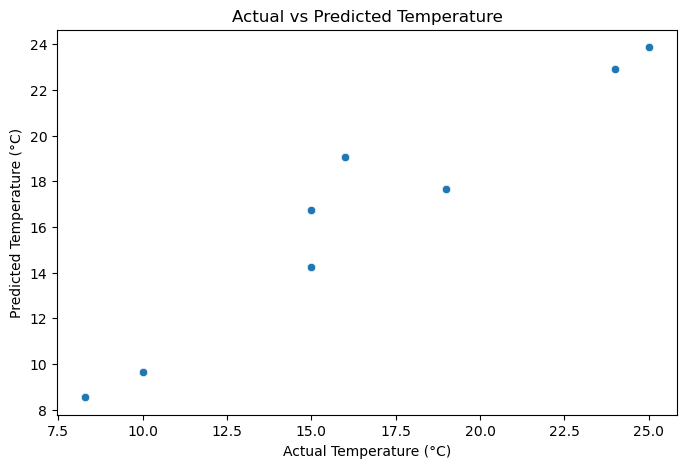

In [92]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=Y_test, y=y_pred)
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted Temperature')
plt.show()

In [ ]:
# USING DIFFERENT LINEAR REGRESSION TYPES TO COMPARE THE MODELS 
# LASSO REGRESSION L1
# RIDGE REGRESSION L2


In [104]:
#DEFINE MODELS
models={
    "Simple Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
}
#store result in 
result={}
#Train and Evaluate each Model
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(Y_test,y_pred)
    r2=r2_score(Y_test,y_pred)
    result[name]={"MSE": mse, "R² Score":r2}

#CONVERT RESULT TO DATAFRAME AND DISPLAY
result_df=pd.DataFrame(result).T
print(result_df)

                               MSE  R² Score
Simple Linear Regression  1.936225  0.941366
Ridge Regression          1.937851  0.941317
Lasso Regression          2.042094  0.938160


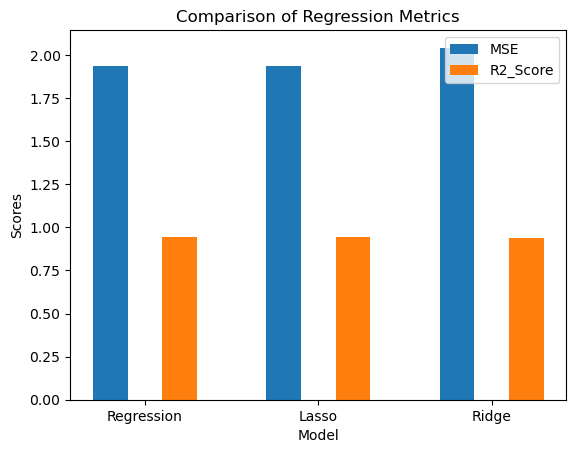

In [107]:
#PLOT COMPARISON

import matplotlib.pyplot as plt
import numpy as np

mse=result_df['MSE']
r2_score=result_df['R² Score']

positions=np.arange(len(mse))
bar_width=0.2

plt.bar(positions - bar_width, mse, width=bar_width, label='MSE')
plt.bar(positions + bar_width, r2_score, width = bar_width, label='R2_Score')

#adding Labels and Titles
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Regression Metrics')

#ADDING THE LEGEND
plt.legend()
plt.xticks(positions, ['Regression', 'Lasso', 'Ridge'])
plt.show()